# EECS 531: Computer Vision Assignment 2
**David Fan**

3/16/18

# Exercise 4

## Problem definition
In this exercise we will compute the principal components from the MNIST dataset. We will then show that individual digits can be approximated by the sum of the first $k$ principal components.

## Setup
First we will load the MNIST dataset and do some preprocessing to get it into a workable state:

In [2]:
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
imgs = mnist.train.images
imgs = np.reshape(imgs, (55000, 28,28))

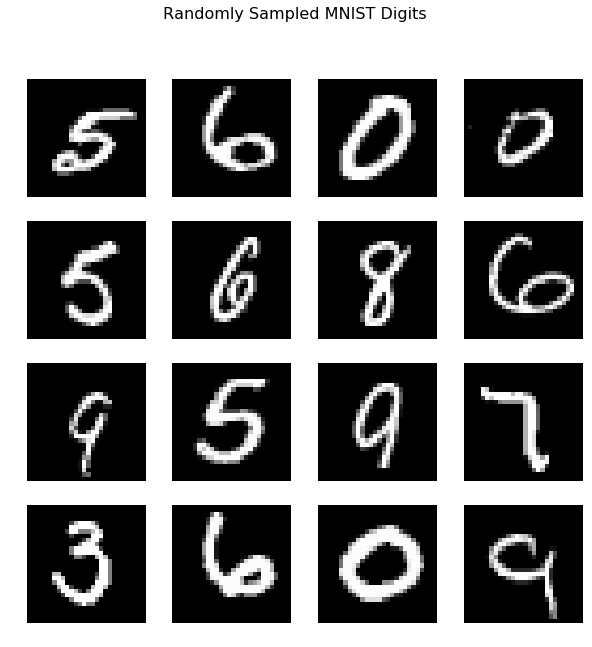

In [5]:
import random
samples = random.sample(range(0, np.shape(imgs)[0]), 16)
figure, axes = plt.subplots(figsize=(10,10), nrows=4, ncols=4)
figure.suptitle("Randomly Sampled MNIST Digits", fontsize=16)
count = 0
for row in axes:
    for ax in row:
        ax.imshow(imgs[samples[count]], cmap='gray')
        ax.axis('off')
        count += 1

## PCA Analysis
Now that we've gone through the difficult process of loading MNIST in python (it's not trivial at first like it was with Matlab... trust me) we can do our PCA analysis:

In [6]:
n, h, w = np.shape(imgs)
X = np.resize(imgs, (n, h*w))

In [9]:
mu = np.mean(X, axis=0)
X = X - np.matlib.repmat(mu, n ,1)

In [11]:
pca = PCA()
pca.fit(X)
coeff = pca.components_
score = pca.transform(X)
latent = pca.explained_variance_

First let us look at the eigenvalues that our PCA analysis has produced:

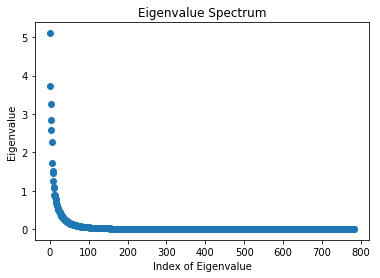

In [12]:
fig, ax = plt.subplots()
ax.set_title('Eigenvalue Spectrum')
ax.set_xlabel('Index of Eigenvalue')
ax.set_ylabel('Eigenvalue')
ax.scatter(np.arange(len(latent)), latent)

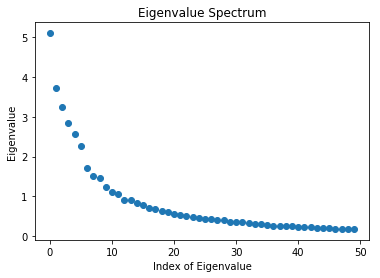

In [13]:
fig, ax = plt.subplots()
ax.set_title('Eigenvalue Spectrum')
ax.set_xlabel('Index of Eigenvalue')
ax.set_ylabel('Eigenvalue')
ax.scatter(np.arange(50), latent[0:50])

Now let us look at the variance ratio:

In [14]:
explained_variance_ratio = pca.explained_variance_ratio_

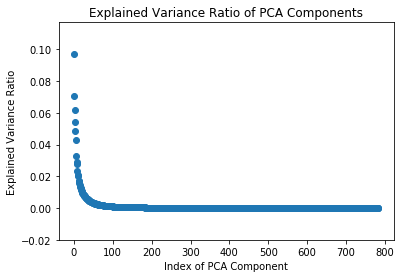

In [15]:
fig, ax = plt.subplots()
ax.set_title('Explained Variance Ratio of PCA Components')
ax.set_xlabel('Index of PCA Component')
ax.set_ylabel('Explained Variance Ratio')
ax.scatter(np.arange(len(explained_variance_ratio)), explained_variance_ratio)

As expected, it seems the first few components account for much more of the variance than the rest of the components. Let's look closer at the first few components: 

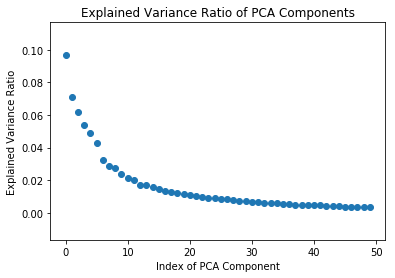

In [16]:
fig, ax = plt.subplots()
ax.set_title('Explained Variance Ratio of PCA Components')
ax.set_xlabel('Index of PCA Component')
ax.set_ylabel('Explained Variance Ratio')
ax.scatter(np.arange(50), explained_variance_ratio[0:50])

Interesting result. Let's visualize this with a cumulative graph:

In [17]:
cumulative_evr = np.cumsum(explained_variance_ratio)

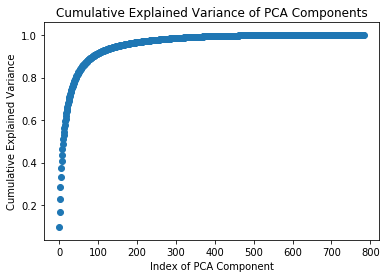

In [18]:
fig, ax = plt.subplots()
ax.set_title('Cumulative Explained Variance of PCA Components')
ax.set_xlabel('Index of PCA Component')
ax.set_ylabel('Cumulative Explained Variance')
ax.scatter(np.arange(len(cumulative_evr)), cumulative_evr)

## PCA Components
Here we will examine the eigenfaces.

In [19]:
components = []
for i in range(7):
    components.append(coeff[i, :].reshape((h, w)))

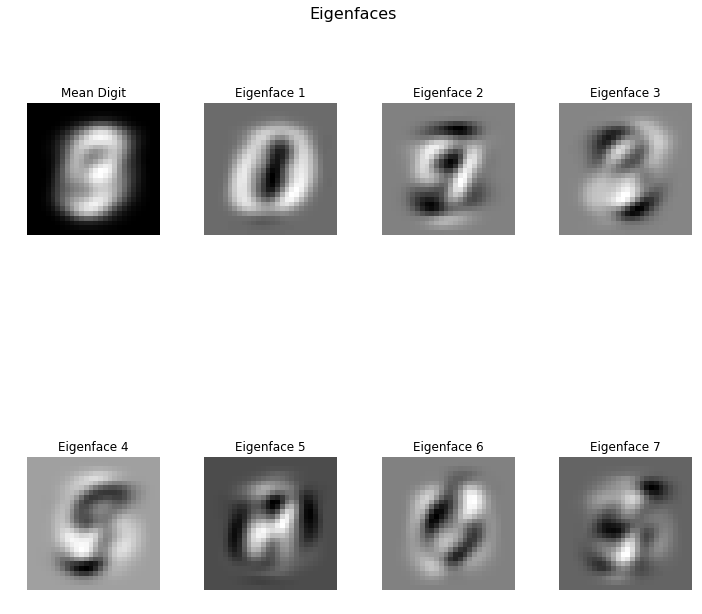

In [20]:
figure, axes = plt.subplots(figsize=(10,10), nrows=2, ncols=4)
figure.suptitle("Eigenfaces", fontsize=16)
plt.tight_layout()
count = 0
for row in axes:
    for ax in row:
        if count == 0:
            ax.imshow(np.resize(mu, (h, w)), cmap='gray')
            ax.set_title('Mean Digit')
        else:
            ax.imshow(components[count - 1], cmap='gray', interpolation='nearest')
            ax.set_title("Eigenface %i" % int(count))
        ax.axis('off')    
        count += 1

## Reconstruct Images
Now we shall attempt to reconstruct the images using their components

In [57]:
id = 255
org = imgs[id, :, :]
mse = np.zeros(4)

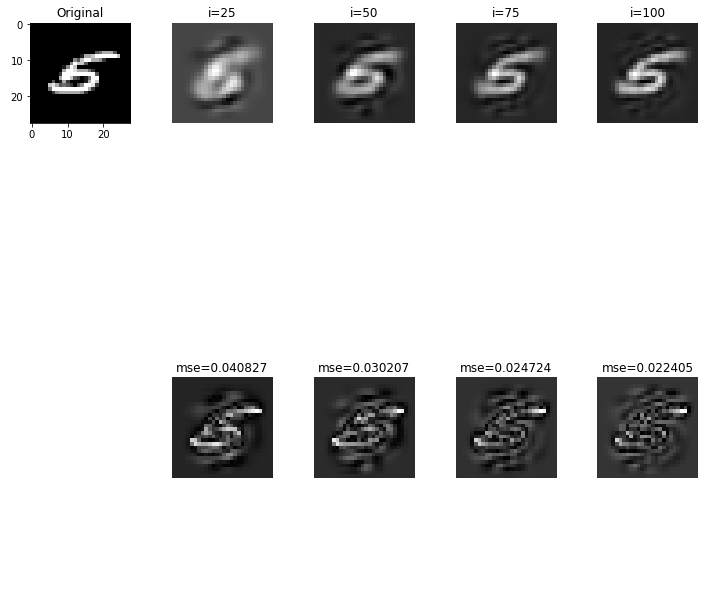

In [63]:
figure, axes = plt.subplots(figsize=(10,10), nrows=2, ncols=5)
plt.tight_layout()

axes[0,0].imshow(org, cmap='gray')
axes[0,0].set_title('Original')
axes[1,0].axis('off')

for i in range(1,5):
    rec_x = np.dot(score[id, 0:i*25].T, coeff[0:i*25, :])
    rec = np.resize(rec_x+mu, (h,w))
    err = rec - org
    mse[i - 1] = np.mean(np.square(err[:]))
    axes[0, i].imshow(rec, cmap='gray')
    axes[0, i].set_title("i=%i" % (i*25))
    axes[0, i].axis('off')
    axes[1, i].imshow(np.abs(err), cmap='gray')
    axes[1, i].set_title("mse=%f" % mse[i - 1])
    axes[1, i].axis('off')